In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#### Plotar gráficos de acurácia

In [74]:
def plotar_grafico_colunas(rmse_values, nome):
    labels = ['Interp. Linear', 'Interp. Ponderada no Tempo', 'KNN', 'Média Móvel', 'Mediana Móvel']
    label_font_size = 6
    colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
    # colors = ['#ce593d', '#af5941', '#5aa5a9', '#07375b', '#5c5034']
    plt.bar(labels, rmse_values, color=colors)
    plt.xticks(fontsize=label_font_size)
        
    plt.xlabel('Métodos')
    plt.ylabel('Acurácia')
    plt.title('Valores Acurácia ' +  nome)


#### Cálculo da acurácia

Ao chamar a função `criar_faixas` dando como parâmetro os datasets (primeiro o com os dados originais e depois o com os dados imputados), é possível ter uma porcentagem de quanto aquele método imputou um valor na faixa correta (baseada na definição de faixas da própria RNP). As faixas são abrangentes, por isso a acurácia é alta

In [75]:
def gerar_porcentagem(array):
    cont = array.count('1')
    porcentagem = (cont/len(array)) * 100
    return porcentagem

def substituir_valor(valor, tamanho_dataset):
    intervalo = tamanho_dataset / 4  # Tamanho de cada intervalo
    if valor < intervalo:
        return "r"
    elif valor > intervalo and valor < intervalo * 2:
        return "o"
    elif  valor > intervalo*2 and valor < intervalo * 3:
        return "y"
    else:
        return "g"

def criar_faixas(completo, preenchido):
    df_preenchido = preenchido
    df_completo = completo
    df_comparativo = pd.DataFrame()
    df_comparativo["Vazao Completa"] = df_completo["Vazao"]
    df_comparativo["Vazao Preenchida"] = df_preenchido["Vazao"]
    df_comparativo["Vazao Faixa"] = 0
    tamanho_dataset = df_comparativo["Vazao Completa"].max() - df_comparativo["Vazao Completa"].min()
    df_comparativo['Vazao Completa'] = df_comparativo['Vazao Completa'].apply(substituir_valor, tamanho_dataset=tamanho_dataset)
    df_comparativo['Vazao Preenchida'] = df_comparativo['Vazao Preenchida'].apply(substituir_valor, tamanho_dataset=tamanho_dataset)
    df_comparativo['Vazao Faixa'] = df_comparativo.apply(lambda row: 1 if row['Vazao Completa'] == row['Vazao Preenchida'] else 0, axis=1)
    cont = (df_comparativo['Vazao Faixa'] == 1).sum()
    porcentagem = (cont/len(df_comparativo)) * 100
    return porcentagem

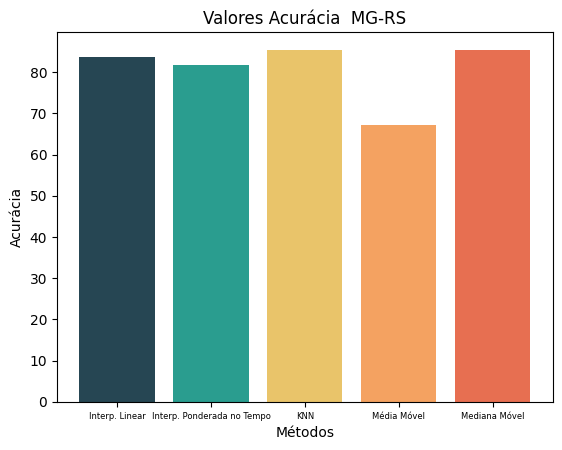

In [76]:
todas_acuracias = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/bbr/06-10-2023/tratado bbr esmond data mg-rs 06-10-2023_longest_interval.csv")
diretorio = "../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/mg-rs"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    porcentagem_acuracia = criar_faixas(df1, df2)
    todas_acuracias[arquivo] = porcentagem_acuracia

acuracy_values = [todas_acuracias[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = " MG-RS"
plotar_grafico_colunas(acuracy_values, nome)

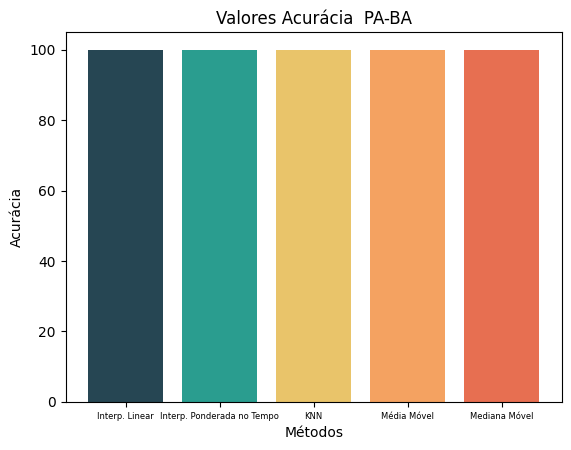

In [77]:
todas_acuracias = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/bbr/06-10-2023/tratado bbr esmond data pa-ba 06-10-2023_longest_interval.csv")
diretorio = "../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/pa-ba"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    porcentagem_acuracia = criar_faixas(df1, df2)
    todas_acuracias[arquivo] = porcentagem_acuracia

acuracy_values = [todas_acuracias[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = " PA-BA"
plotar_grafico_colunas(acuracy_values, nome)

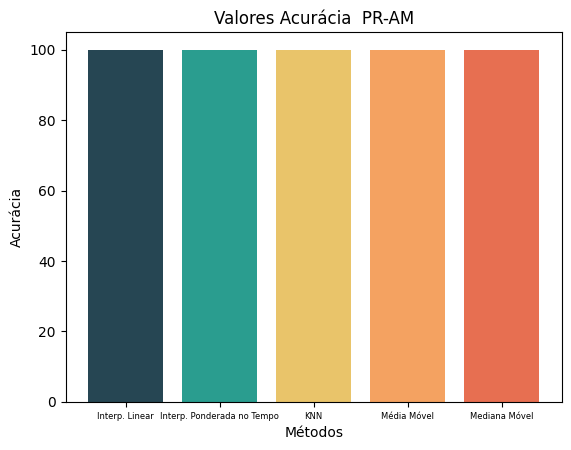

In [78]:
todas_acuracias = {}
df1 = pd.read_csv("../../datasets/processados/amostras_continuas/vazao/bbr/06-10-2023/tratado bbr esmond data pr-am 06-10-2023_longest_interval.csv")
diretorio = "../../datasets/processados/amostras_imputadas/vazao/bbr/06-10-2023/pr-am"
for arquivo in os.listdir(diretorio):
    df2 = pd.read_csv(os.path.join(diretorio, arquivo))
    porcentagem_acuracia = criar_faixas(df1, df2)
    todas_acuracias[arquivo] = porcentagem_acuracia

acuracy_values = [todas_acuracias[key] for key in ['interp linear.csv', 'interp ponderada.csv', 'knn.csv', 'media movel.csv', 'mediana movel.csv']]
nome = " PR-AM"
plotar_grafico_colunas(acuracy_values, nome)